In [ ]:
pip install pyformlang

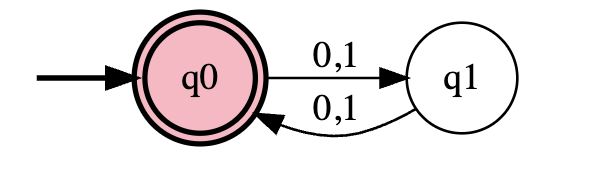

The Automaton in the simulator [link](https://ivanzuzak.info/noam/webapps/fsm_simulator/)

```
#states
q0
q1
#initial
q0
#accepting
q0
#alphabet
0
1
#transitions
q0:0>q1
q0:1>q1
q1:0>q0
q1:1>q0
```

## Give examples of Strings in $L(M)$

In [ ]:
from pyformlang.finite_automaton import DeterministicFiniteAutomaton, State


In [ ]:
q0 = State("q0")
q1 = State("q1")

In [ ]:
dfa = DeterministicFiniteAutomaton(
    states={q0, q1},
    input_symbols={"0", "1"},
    start_state=q0,
    final_states={q0}  # Define the set of accepting states
)

In [ ]:
dfa.add_transitions([(q0,'0',q1),
                    (q0,'1',q1),
                    (q1,'0',q0),
                    (q1,'1',q0)])

1

In [ ]:
print("Word '00' is accepted:", dfa.accepts('00'))
print("Word '0101' is accepted:", dfa.accepts('0101'))
print("Word '110' is not accepted:", dfa.accepts('110'))
print("Word '1' is not accepted:", dfa.accepts('1'))
print("Word '0' is not accepted:", dfa.accepts('0'))

Word '00' is accepted: True
Word '0101' is accepted: True
Word '110' is not accepted: False
Word '1' is not accepted: False
Word '0' is not accepted: False


In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Cadena': ['00', '010', '0000', '11', '0'],
        'City': ['New York', 'London', 'Paris', 'New York', 'London']}
df = pd.DataFrame(data)

filtered_df = df[df['Cadena'] (lambda x: dfa.accepts(x))) ]

print(filtered_df)

      Name Cadena      City
0    Alice     00  New York
2  Charlie   0000     Paris
3    David     11  New York


In [ ]:
filtered_df['Accepted'] = filtered_df['Cadena'].apply(lambda x: dfa.accepts(x))

print(filtered_df)

df.loc[df['Cadena'].apply(lambda x: dfa.accepts(x)), 'Category'] = 'Yes'


      Name Cadena      City  Accepted Category
0    Alice     00  New York      True      Yes
2  Charlie   0000     Paris      True      Yes
3    David     11  New York      True      Yes


/tmp/ipython-input-2283946143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Accepted'] = filtered_df['Cadena'].apply(lambda x: dfa.accepts(x))


In [ ]:

dfa = DeterministicFiniteAutomaton()

even = State("even")  # even count of 0s so far
odd  = State("odd")   # odd count of 0s so far

dfa.add_start_state(even)
dfa.add_final_state(even)

# On '0': toggle
dfa.add_transition(even, "0", odd)
dfa.add_transition(odd,  "0", even)

# On '1': stay
dfa.add_transition(even, "1", even)
dfa.add_transition(odd,  "1", odd)

# Quick tests
def acc(w):
    return dfa.accepts(list(w))  # e.g., "10100" -> ['1','0','1','0','0']

print(acc(""))        # True  (ε has 0 zeros)
print(acc("1"))       # True
print(acc("0"))       # False
print(acc("10"))      # False
print(acc("1010"))    # True
print(acc("0011"))    # True


True
True
False
False
True
True


# NFA

In [ ]:
from pyformlang.finite_automaton import NondeterministicFiniteAutomaton

In [ ]:
nfa = NondeterministicFiniteAutomaton()
nfa.add_transition('q0','a','q1')
nfa.add_transition('q0','a','q2')
nfa.add_transition('q0','c','q3')
nfa.add_transition('q1','b','q4')
nfa.add_transition('q4','a','q4')
nfa.add_transition('q2','c','q5')
nfa.add_transition('q5','c','q5')
nfa.add_transition('q3','c','q3')
nfa.add_start_state('q0')
nfa.add_final_state('q4')
nfa.add_final_state('q5')
nfa.add_final_state('q3')

1

In [ ]:
print(nfa.accepts('ab'))
print(nfa.accepts('abc'))
print(nfa.accepts('abaaaa'))
print(nfa.accepts('abab'))
print(nfa.accepts('accc'))
print(nfa.accepts('bac'))
print(nfa.accepts('c'))
print(nfa.accepts('caaab'))

True
False
True
False
True
False
True
False


# ENFA

In [ ]:
from pyformlang.finite_automaton import EpsilonNFA
enfa = EpsilonNFA()
enfa.add_transition('q0','a','q1')
enfa.add_transition('q1','epsilon','q2')
enfa.add_transition('q2','b','q2')
enfa.add_transition('q2','c','q3')
enfa.add_transition('q1','epsilon','q4')
enfa.add_transition('q4','a','q5')
enfa.add_transition('q5','a','q5')
enfa.add_transition('q1','epsilon','q6')
enfa.add_transition('q6','c','q7')
enfa.add_transition('q7','b','q8')
enfa.add_transition('q8','b','q8')
enfa.add_start_state('q0')
enfa.add_final_state('q3')
enfa.add_final_state('q5')
enfa.add_final_state('q8')

1

In [ ]:
print(enfa.accepts('ac'))
print(enfa.accepts('abc'))
print(enfa.accepts('abaaaa'))
print(enfa.accepts('abab'))
print(enfa.accepts('acbbb'))
print(enfa.accepts('bac'))
print(enfa.accepts('aaaa'))

True
True
False
False
True
False
True
